#**Bootcamp Analisis de datos Nivel Innovador** - **Talento Tech**

#**PROYECTO FINAL**

##**Estudiante:** Julian Ramirez Burbano

*   Link repositorio GitHub = https://github.com/julirami/TalentoTech/tree/main/ProyectoFinal
*   Link Video YouTube = https://youtu.be/WTtt4BMnVkk




#**Nombre proyecto: Análisis de Desempeño en la Prueba Saber 11**



###**Introducción**:

En este proyecto se realiza un completo análisis del desempeño de los estudiantes en la Prueba Saber 11 en el periodo 2019-2 especificamente en el departamento de Nariño (Colombia). Esta prueba es un examen obligatorio que se realiza en Colombia con el fin de medir las habilidades y conocimientos que han adquirido los estudiantes al terminar la educación media mas conocida como bachillerato. Se usaron tecnicas de visualización, análisis estadístico y modelado predictivo, para estudiar todos los datos y asi lograr analizar distintos aspectos del desempeño estudiantil en las asignaturas evaluadas y su relación con el género y el municipio donde residen.

###**Datos Utilizados**:

Los datos que utilicé para analizar fueron obtenidos del repositorio público DATOS ABIERTOS de Colombia en la Web WWW.GOV.CO especificamente en el link = https://www.datos.gov.co/Educaci-n/PUNTAJE-ICFES-POR-DEPARTAMENTOS/x9vi-iv8c

El conjunto de datos tiene información detallada sobre el rendimiento de los estudiantes en el Prueba Saber 11 en diferentes áreas como matemáticas, lectura crítica, ciencia sociales y ciencias naturales, ingles, y puntajes globales. También, hay informacion de la ubicacion de los estudiantes, su género y el municipio de residencia.

#**Objetivos**

*   Examinar la distribución de los puntajes obtenidos por los estudiantes en las diferentes áreas evaluadas, que incluyen matemáticas, lectura crítica, ciencias naturales, sociales y ciudadanas, e inglés. Esto permitirá identificar posibles tendencias o patrones en los puntajes globales, proporcionando una visión general del rendimiento académico en el departamento de Nariño durante el periodo de estudio.

*   Evaluar las diferencias en los puntajes obtenidos por los estudiantes según su género. Además, se busca comparar los puntajes globales entre los diferentes municipios del departamento de Nariño. Esto ayudará a entender mejor cómo el género y el lugar de residencia pueden influir en el desempeño académico de los estudiantes en la Prueba Saber 11.

*   Entender cómo tanto el nivel educativo de los padres como la disponibilidad de recursos tecnológicos y otros en el hogar influyen en el rendimiento académico de los estudiantes. Utilizando gráficos de calor y otras herramientas de visualización, se pretende identificar correlaciones significativas entre estos factores y los puntajes globales obtenidos en las pruebas. Este análisis proporcionará insights importantes para comprender la influencia de estas variables en el desempeño estudiantil, lo que podría guiar futuras intervenciones educativas.

###**Variables**

**Variables Demográficas y Contextuales:**

-ESTU_TIPODOCUMENTO: Tipo de documento del estudiante.

-ESTU_NACIONALIDAD: Nacionalidad del estudiante.

-ESTU_GENERO: Género del estudiante.

-ESTU_FECHANACIMIENTO: Fecha de nacimiento del estudiante.

-ESTU_DEPTO_RESIDE: Departamento de residencia del estudiante.

-ESTU_MCPIO_RESIDE: Municipio de residencia del estudiante.

-ESTU_DEPTO_PRESENTACION: Departamento de presentación de la prueba.

-ESTU_MCPIO_PRESENTACION: Municipio de presentación de la prueba.

**Variables Familiares y Socioeconómicas:**

-FAMI_ESTRATOVIVIENDA: Estrato de vivienda.

-FAMI_PERSONASHOGAR: Número de personas en el hogar.

-FAMI_CUARTOSHOGAR: Número de cuartos en el hogar.

-FAMI_EDUCACIONPADRE: Nivel educativo del padre.

-FAMI_EDUCACIONMADRE: Nivel educativo de la madre.

-FAMI_TIENEINTERNET: Si tienen internet en el hogar.

-FAMI_TIENECOMPUTADOR: Si tienen computadora en el hogar.

-FAMI_TIENECONSOLAVIDEOJUEGOS: Si tienen consola de videojuegos en el hogar.

-FAMI_NUMLIBROS: Número de libros en el hogar.

**Variables Académicas:**


-COLE_NOMBRE_ESTABLECIMIENTO: Nombre del colegio.

-COLE_GENERO: Género del colegio (mixto, masculino, femenino).

-COLE_NATURALEZA: Naturaleza del colegio (oficial, privado).

-COLE_CALENDARIO: Calendario del colegio (A, B).

-COLE_CARACTER: Carácter del colegio (académico, técnico).

-COLE_AREA_UBICACION: Área de ubicación del colegio (urbano, rural).

-COLE_JORNADA: Jornada del colegio (mañana, tarde).

**Variables de Desempeño:**


-PUNT_LECTURA_CRITICA: Puntaje en lectura crítica.

-PUNT_MATEMATICAS: Puntaje en matemáticas.

-PUNT_C_NATURALES: Puntaje en ciencias naturales.

-PUNT_SOCIALES_CIUDADANAS: Puntaje en sociales y ciudadanas.

-PUNT_INGLES: Puntaje en inglés.

-PUNT_GLOBAL: Puntaje global.

In [1]:
# Se importan las librerias necesarias para el analisi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Configuraciones iniciales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Cargar el dataset que se encuentra almacenado en un GitHub publico
url = "https://raw.githubusercontent.com/julirami/proyectoTTCH/main/Saber_11__2019-2_20240516.csv"
data = pd.read_csv(url, sep=";")

###**Proceso de Análisis:**

El siguiente paso es analizar los datos, esto implica cargar y limpiar los datos, lo que involucra eliminar las filas que contienen valores nulos en las columnas de datos objetivo. También se realiza una exploración descriptiva de los datos.

Los resumenes de las estadisticas, las visualizaciones, los histogramas, los gráficos de caja y los mapas geoespaciales, especificamente se usan para analiza cómo se distribuyen los puntajes en diferentes áreas, así como cualquier desigualdad que pueda existir basada en el género o el municipio.

In [2]:
# Se muestran las primeras filas del dataset para empezar el analisis exploratorio de datos
print(data.head())

  ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO    ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           F  12/15/2001 12:00:00 AM   
1                 TI          COLOMBIA           M                   37681   
2                 TI          COLOMBIA           M                   37229   
3                 TI          COLOMBIA           F  01/30/2002 12:00:00 AM   
4                 CC          COLOMBIA           F                   36982   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_TIENEETNIA ESTU_PAIS_RESIDE  \
0    20194  SB11201940310846      ESTUDIANTE              No         COLOMBIA   
1    20194  SB11201940458710      ESTUDIANTE              Si         COLOMBIA   
2    20194  SB11201940375235      ESTUDIANTE              No         COLOMBIA   
3    20194  SB11201940254688      ESTUDIANTE              Si         COLOMBIA   
4    20194  SB11201940027891      ESTUDIANTE              No         COLOMBIA   

                   ESTU_ETNIA ESTU_DEPTO_RES

In [3]:
# Se imprime información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16903 entries, 0 to 16902
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             16903 non-null  object 
 1   ESTU_NACIONALIDAD              16903 non-null  object 
 2   ESTU_GENERO                    16903 non-null  object 
 3   ESTU_FECHANACIMIENTO           16903 non-null  object 
 4   PERIODO                        16903 non-null  int64  
 5   ESTU_CONSECUTIVO               16903 non-null  object 
 6   ESTU_ESTUDIANTE                16903 non-null  object 
 7   ESTU_TIENEETNIA                16903 non-null  object 
 8   ESTU_PAIS_RESIDE               16903 non-null  object 
 9   ESTU_ETNIA                     16903 non-null  object 
 10  ESTU_DEPTO_RESIDE              16903 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          16903 non-null  int64  
 12  ESTU_MCPIO_RESIDE              16903 non-null 

In [4]:
# Explorando los datos
print(data.describe().T)

                                 count           mean            std      min  \
PERIODO                        16903.0   20194.000000       0.000000  20194.0   
ESTU_COD_RESIDE_DEPTO          16903.0      52.000000       0.000000     52.0   
ESTU_COD_RESIDE_MCPIO          16903.0   52366.028811     307.586957  52001.0   
COLE_CODIGO_ICFES              16903.0  119261.781400  164534.639443   9761.0   
COLE_COD_MCPIO_UBICACION       16903.0   52381.887831    1445.789856  11001.0   
COLE_COD_DEPTO_UBICACION       16903.0      52.016151       1.406044     11.0   
ESTU_COD_MCPIO_PRESENTACION    16903.0   52387.503283    1755.444520   5001.0   
ESTU_COD_DEPTO_PRESENTACION    16903.0      52.044312       1.725682      5.0   
PUNT_LECTURA_CRITICA           16903.0      51.222623      10.550399      0.0   
PERCENTIL_LECTURA_CRITICA      16903.0      47.643318      28.905991      1.0   
DESEMP_LECTURA_CRITICA         16903.0       2.550731       0.761231      1.0   
PUNT_MATEMATICAS            

In [5]:
# Se verifica si hay valores faltantes en el conjunto de datos y devuelve un mensaje indicando si existen ("True") o no ("False").
print(f"Hay valores desconocidos: {data.isnull().values.any()}")

Hay valores desconocidos: True


In [6]:
# Se limpia el dataset con el fin de eliminar filas con valores faltantes en variables de objetivo
columnas_interes = [
    'ESTU_GENERO', 'PUNT_GLOBAL', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_INGLES', 'ESTU_MCPIO_RESIDE']

data = data.dropna(subset=columnas_interes)

In [7]:
# Se describen de forma estadística de las variaibles objetivo
print(data[columnas_interes].describe().T)

                            count        mean        std   min    25%    50%  \
PUNT_GLOBAL               16903.0  244.311306  52.061527  95.0  205.0  242.0   
PUNT_MATEMATICAS          16903.0   50.683606  12.291657  15.0   42.0   51.0   
PUNT_LECTURA_CRITICA      16903.0   51.222623  10.550399   0.0   44.0   51.0   
PUNT_SOCIALES_CIUDADANAS  16903.0   45.617701  11.922236  17.0   36.0   45.0   
PUNT_C_NATURALES          16903.0   48.507543  11.165361   0.0   40.0   48.0   
PUNT_INGLES               16903.0   47.115837  11.969232   0.0   38.0   47.0   

                            75%    max  
PUNT_GLOBAL               282.0  452.0  
PUNT_MATEMATICAS           60.0  100.0  
PUNT_LECTURA_CRITICA       59.0  100.0  
PUNT_SOCIALES_CIUDADANAS   54.0  100.0  
PUNT_C_NATURALES           57.0  100.0  
PUNT_INGLES                55.0  100.0  


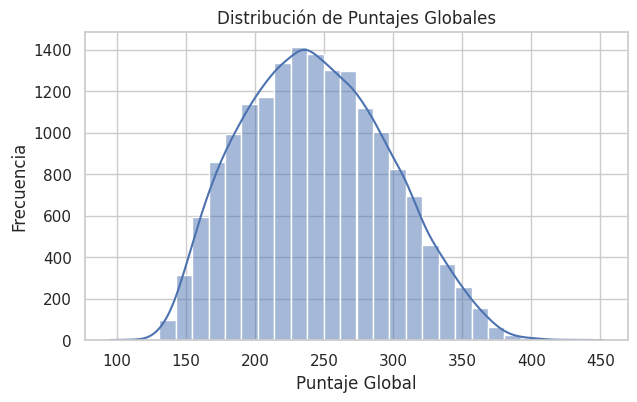

In [8]:
# Histograma de los puntajes globales
plt.figure(figsize=(7, 4))
sns.histplot(data['PUNT_GLOBAL'], bins=30, kde=True)
plt.title('Distribución de Puntajes Globales')
plt.xlabel('Puntaje Global')
plt.ylabel('Frecuencia')
plt.show()

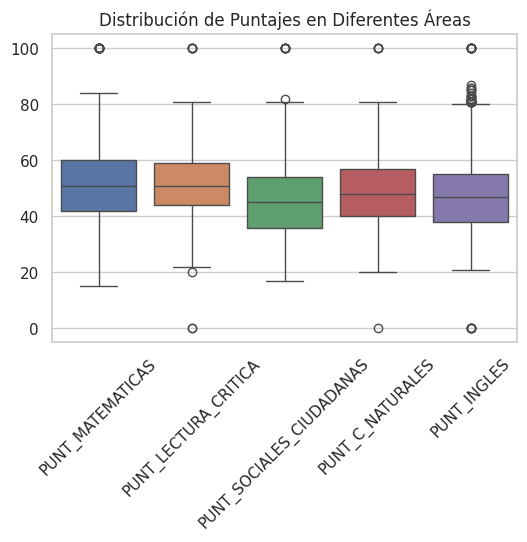

In [9]:
# Boxplots para los puntajes en las diferentes asignaturas
plt.figure(figsize=(6, 4))
sns.boxplot(data=data[columnas_interes[2:]])
plt.title('Distribución de Puntajes en Diferentes Áreas')
plt.xticks(rotation=45)
plt.show()

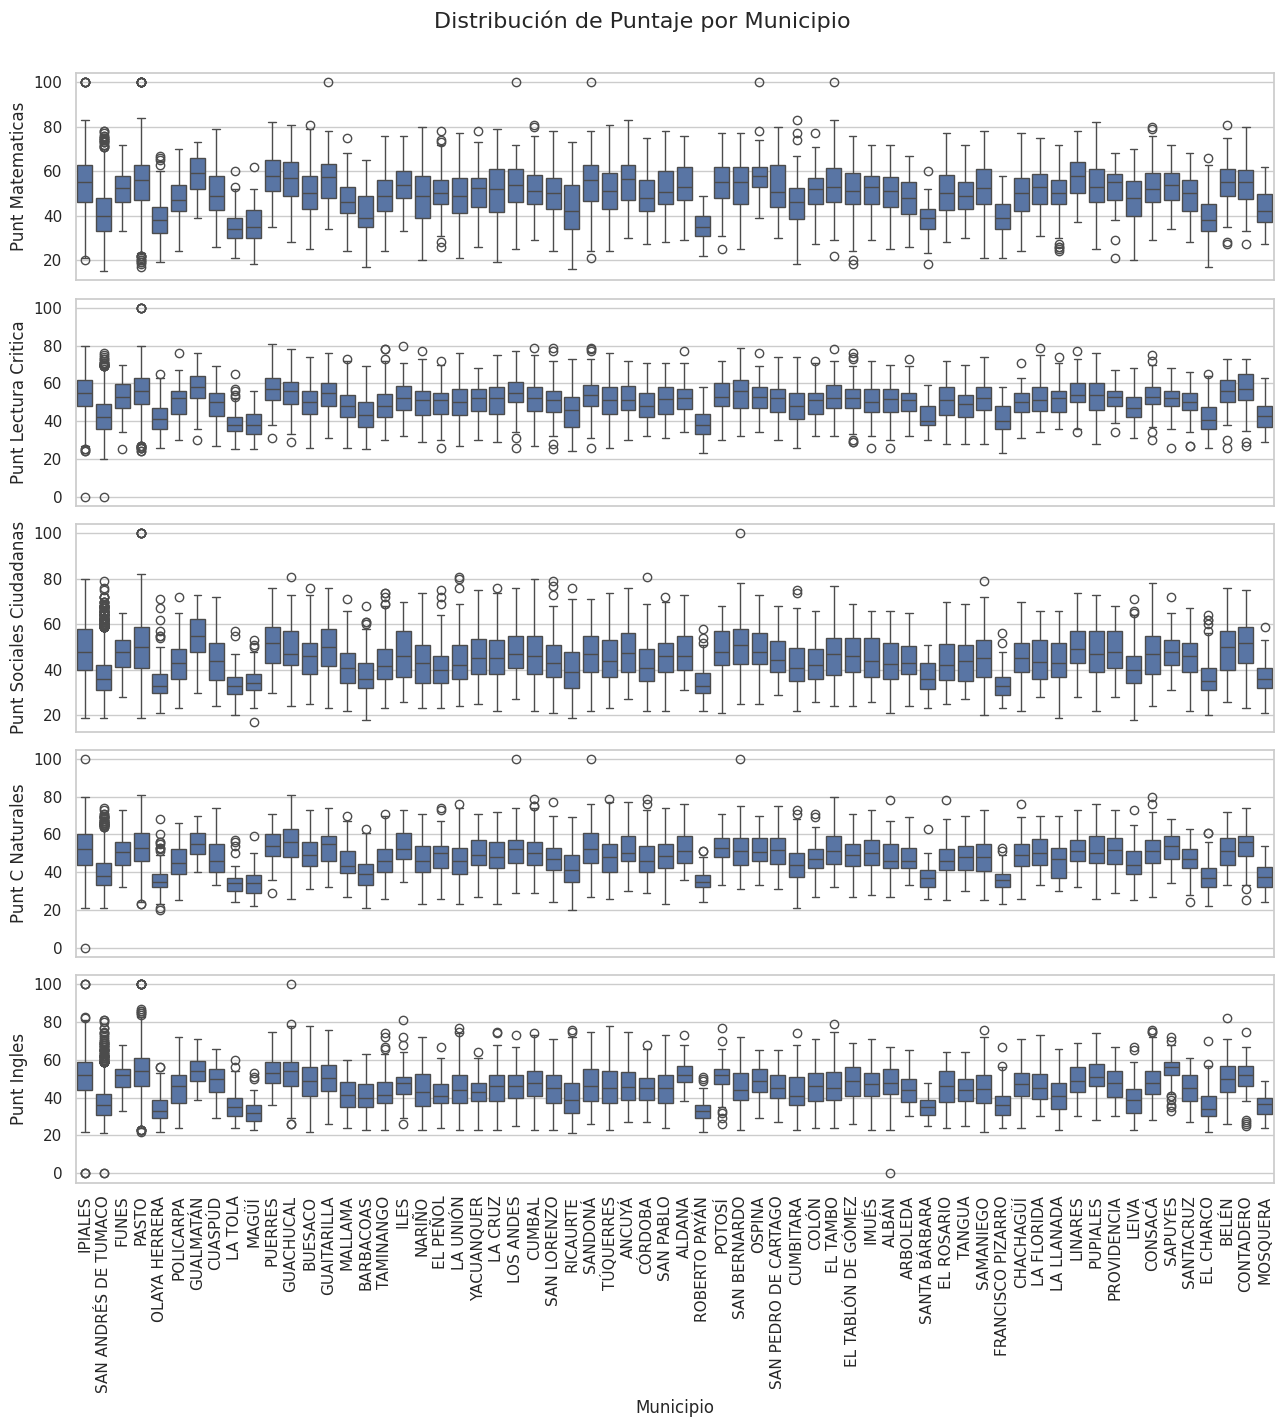

In [10]:
# Se definen las variables objetiivo pero excluyendo la variable "PUNT_GLOBAL", para trabajar algunas graficas
columnas_grafica = ['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_INGLES']

# Se crear una grafica con subplots enfocado en observar la distribucion por municipios
fig, axs = plt.subplots(len(columnas_grafica), 1, figsize=(13, 15), sharex=True)

for i, col in enumerate(columnas_grafica):
    sns.boxplot(x='ESTU_MCPIO_RESIDE', y=col, data=data, ax=axs[i])
    axs[i].set_ylabel(col.replace("_", " ").title())
    if i < len(columnas_grafica) - 1:
        axs[i].set_xlabel('')
    axs[i].tick_params(axis='x', rotation=90)

axs[-1].set_xlabel('Municipio')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Distribución de Puntaje por Municipio', fontsize=16)

plt.show()

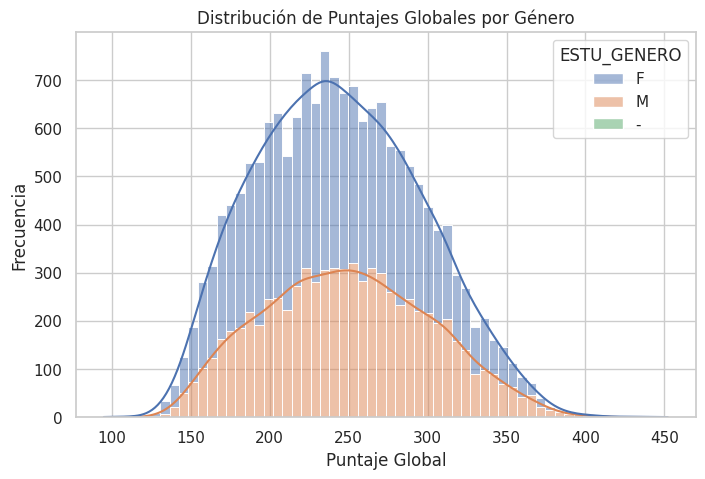

In [11]:
# Gráfico de barras apiladas por género
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='PUNT_GLOBAL', hue='ESTU_GENERO', multiple='stack', kde=True)
plt.title('Distribución de Puntajes Globales por Género')
plt.xlabel('Puntaje Global')
plt.ylabel('Frecuencia')
plt.show()

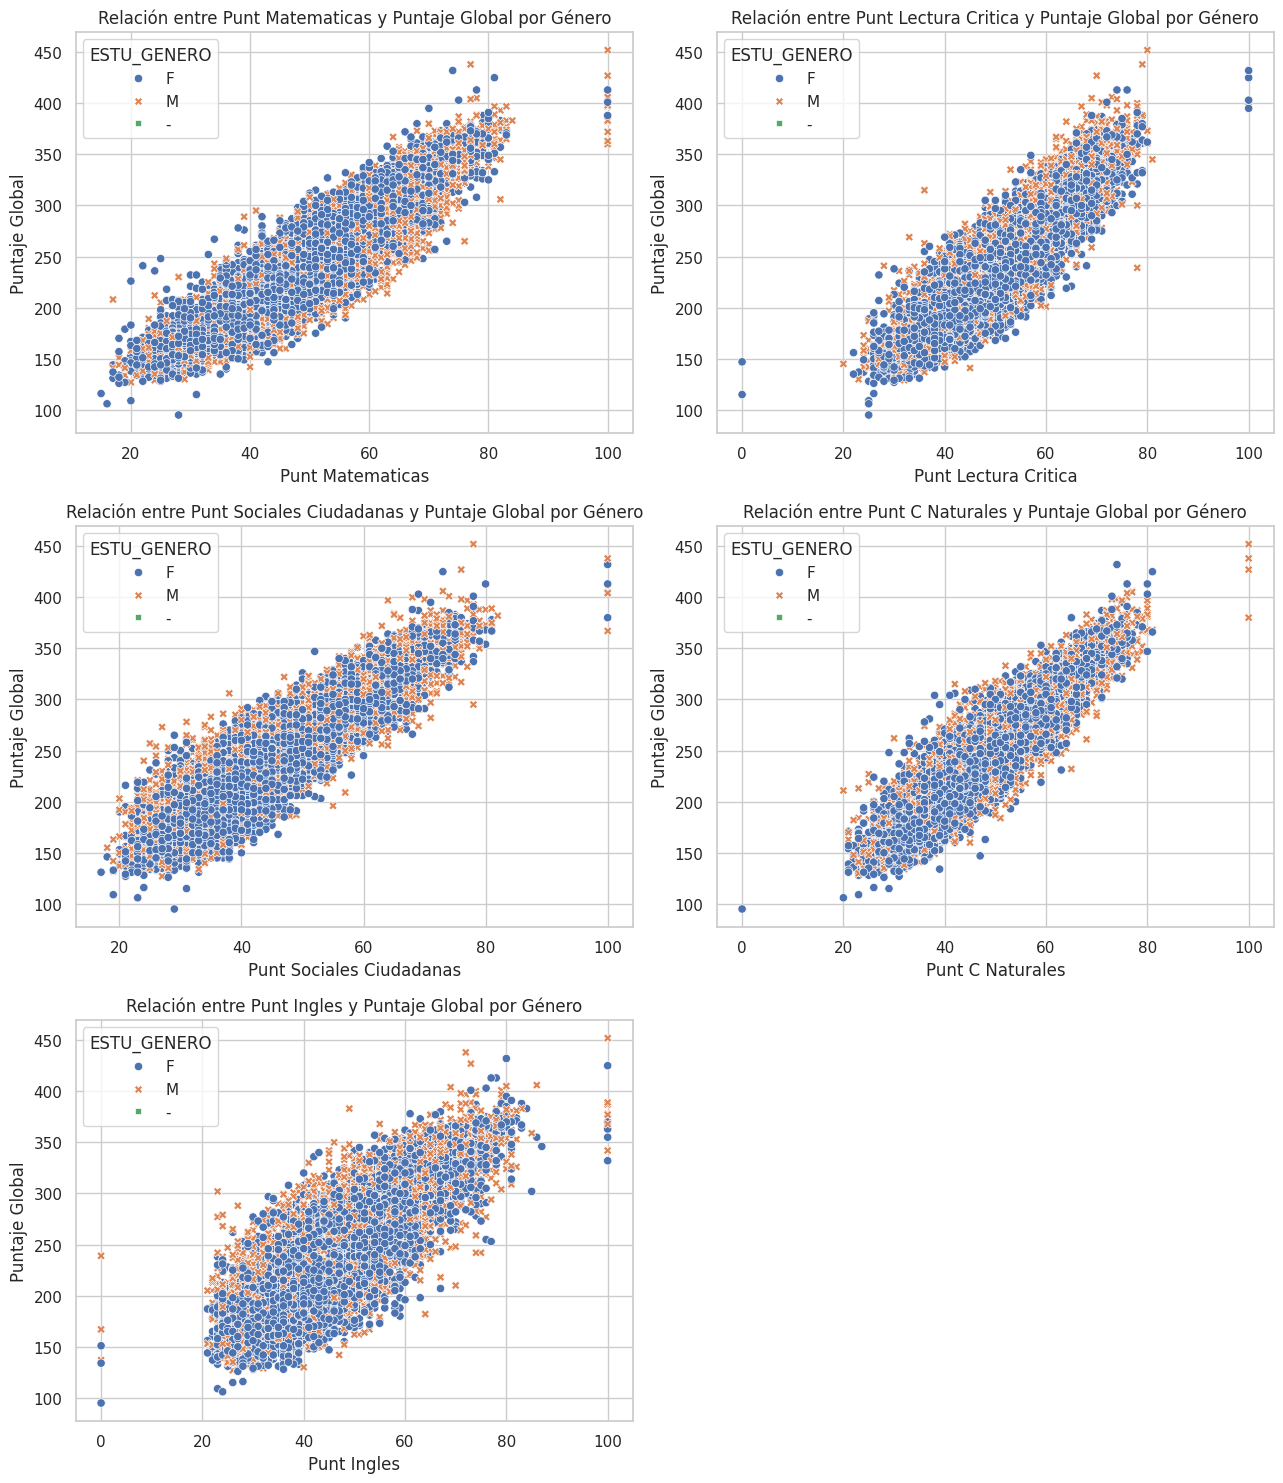

In [12]:
# Se crea un grafico de dispecrcion para ver las relaciones entre el genero y los puntasjes
fig, axs = plt.subplots(3, 2, figsize=(13, 15))

for i, col in enumerate(columnas_grafica):
    row = i // 2
    col_pos = i % 2
    sns.scatterplot(x=col, y='PUNT_GLOBAL', hue='ESTU_GENERO', style='ESTU_GENERO', data=data, ax=axs[row, col_pos])
    axs[row, col_pos].set_title(f'Relación entre {col.replace("_", " ").title()} y Puntaje Global por Género')
    axs[row, col_pos].set_xlabel(col.replace("_", " ").title())
    axs[row, col_pos].set_ylabel('Puntaje Global')

# importante, aqui elimina graficos vacios
if len(columnas_grafica) % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()

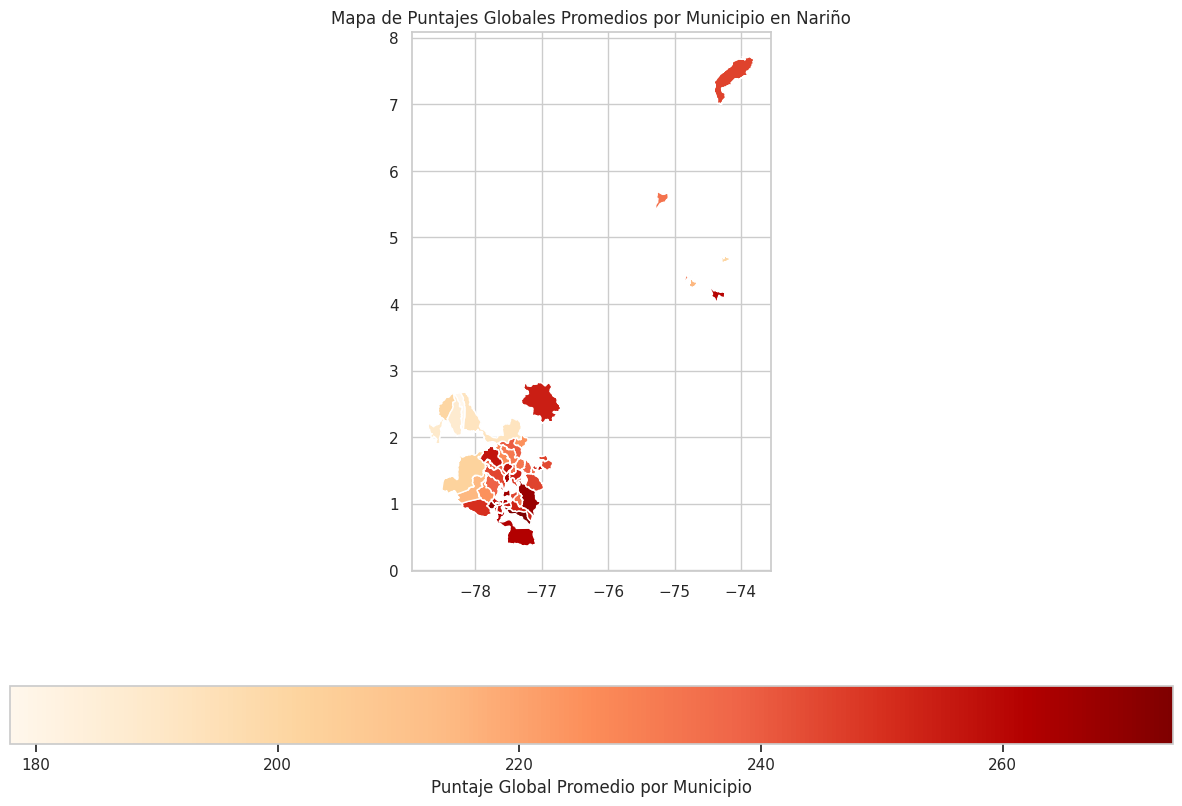

In [13]:
# URL del archivo GeoJSON de los límites de los municipios de Nariño en Google Drive
geojson_url = 'https://drive.google.com/uc?id=1rge0WctTRXHAkkdoniWlZWBzoH8v0IYn'

# Descargar el archivo GeoJSON
response = requests.get(geojson_url)
geojson_data = BytesIO(response.content)

# Cargar el archivo GeoJSON
gdf = gpd.read_file(geojson_data)

# Asumir que la columna correcta se llama 'MPIO_CNMBR', ajusta esto según corresponda
municipality_column = 'MPIO_CNMBR'

# Agrupar los datos por municipio y calcular el puntaje promedio
municipios = data.groupby('ESTU_MCPIO_RESIDE')['PUNT_GLOBAL'].mean().reset_index()

# Renombrar las columnas para que coincidan con el GeoDataFrame
municipios.columns = [municipality_column, 'PUNT_GLOBAL']

# Unir los datos geográficos con los puntajes promedio
gdf = gdf.merge(municipios, on=municipality_column, how='left')

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='PUNT_GLOBAL', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Puntaje Global Promedio por Municipio", 'orientation': "horizontal"})
plt.title('Mapa de Puntajes Globales Promedios por Municipio en Nariño')
plt.show()

El anterior analisis geoespacial, ayuda a entender las diferencias en el desempeño académico a nivel municipal. Se logra observar que esta información es muy importante para identificar los municipios que necesitan mejorar y se tendra que diseñar planes de mejora continua con el fin de mejorar los resultados de estas pruebas.

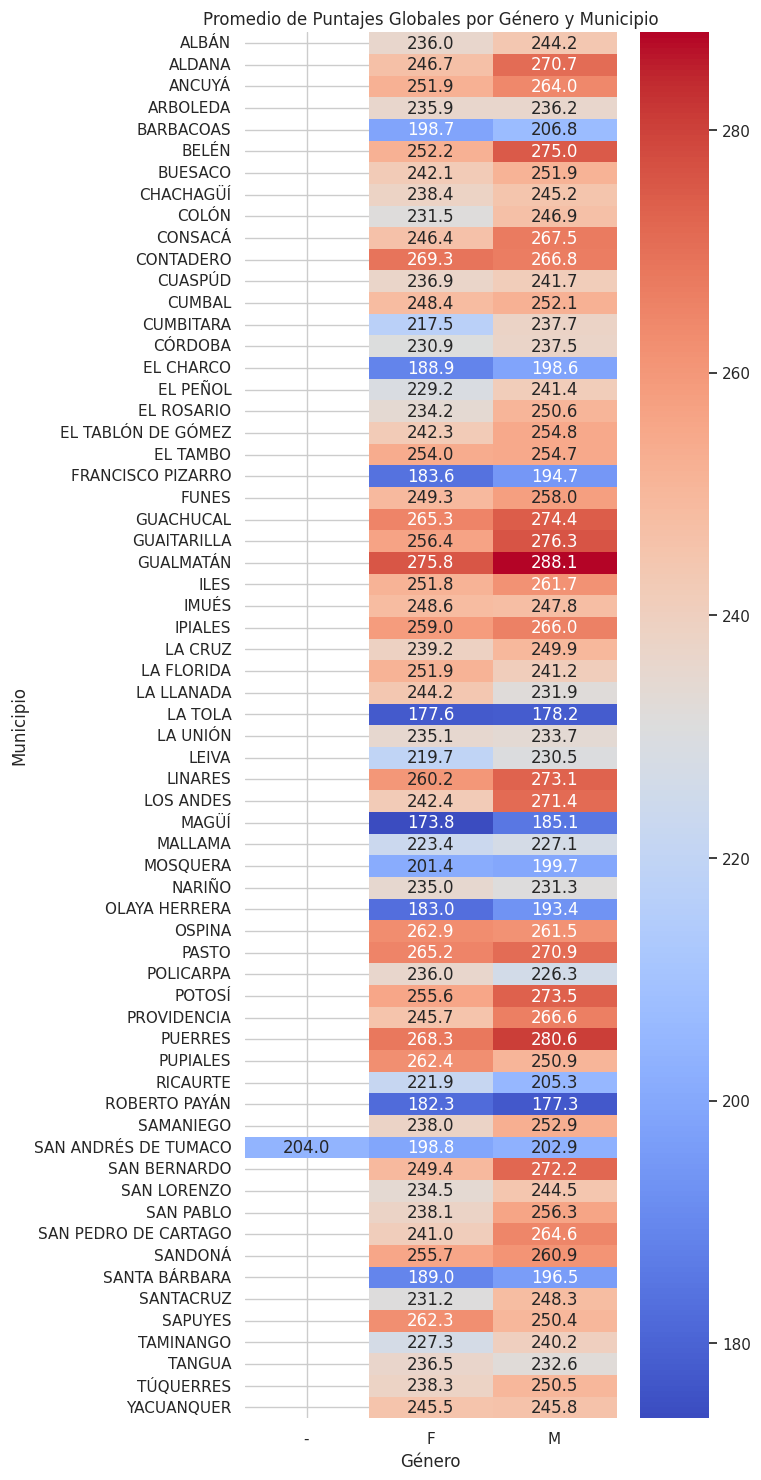

In [14]:
# Se crea la tabla de calor para observar los puntajes globales por género y municipio
pivot_table = data.pivot_table(values='PUNT_GLOBAL', index='ESTU_MCPIO_RESIDE', columns='ESTU_GENERO', aggfunc='mean')
plt.figure(figsize=(6, 18))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Promedio de Puntajes Globales por Género y Municipio')
plt.xlabel('Género')
plt.ylabel('Municipio')
plt.show()

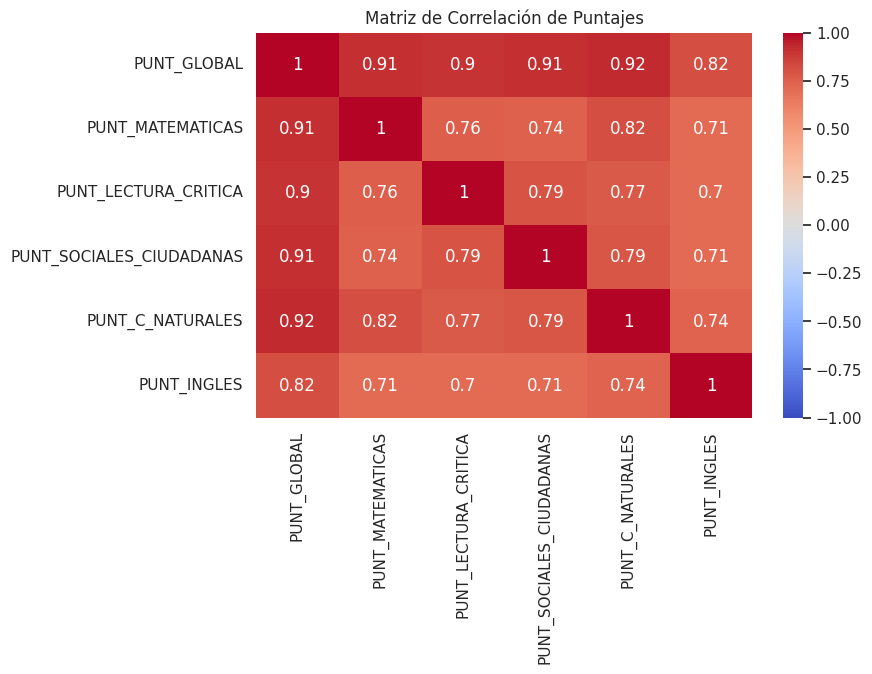

In [15]:
# Aqui se seleccionan sólo las variables objetivo que sean numericas para la matriz de correlación
columnas_numericas = ['PUNT_GLOBAL', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_INGLES']

# Matriz de correlación
plt.figure(figsize=(8, 5))
correlation_matrix = data[columnas_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Puntajes')
plt.show()

Las altas correlaciones entre los puntajes de cada area y el puntaje global muestran que el desempeño en cada área contribuye significativamente al puntaje total, esta información es vital y con ella se puede identificar aspectos clave de mejora y para diseñar estrategias educativas más integrales y dentro de este analisis, nos ayuda a identificar que existe una correlación positiva fuerte ya que si los puntajes de cada area aumentan, los puntajes globales también tienden a aumentar significativamente.

#**Entrenamiento de modelos de regresión**

En este proyecto voy a utilizar dos métodos diferentes en el análisis con el fin de mejorar la precisión y validez de las predicciones que se van a realizar al final, también usar 2 modelos de estudio genera un analisi mas completo y detallado de los datos. En general esto permite hacer recomendaciones más validas deacuerdo a los datos, que son la evidencia de este proyecto.

Al final la conclucion sera que la evaluacion de los dos metodos ayudara a la toma de decisiones despues del analsis y que estas sirvan para mejorar el desempeño estudiantil de las pruebas en un futuro.

In [16]:
# Se seleccionan las variables independientes y dependientes
X = data[['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_INGLES']]
y = data['PUNT_GLOBAL']

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Se entrena el modelo de REGRESION LINEAL
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Se realizan las predicciones con el conjunto de prueba
y_pred_rl = model.predict(X_test)

# Se evaluar el modelo
mse_rl = mean_squared_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

# Se imprimen los resultados evaluados
print(f"Mean Squared Error: {mse_rl}")
print(f"R-squared: {r2_rl}")

Mean Squared Error: 0.08660050616047052
R-squared: 0.9999676459464607


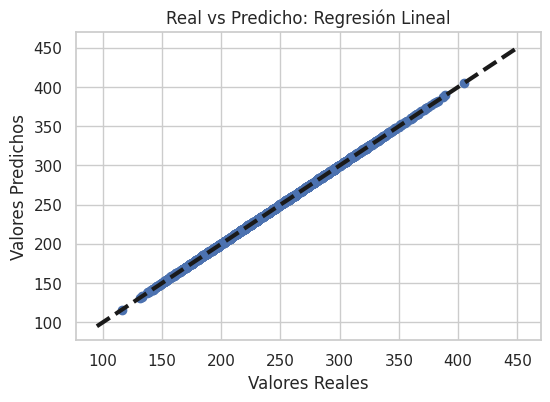

In [18]:
# Se visualizan los resultados
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rl)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Real vs Predicho: Regresión Lineal')
plt.show()

In [19]:
# Se entrena un modelo de RANDOM FOREST
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Se realizan las predicciones con el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Se evalua el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Se imprimen los resultados evaluados
print("\nModelo de Bosques Aleatorios:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


Modelo de Bosques Aleatorios:
Mean Squared Error: 4.986242578356004
R-squared: 0.9981371337594596


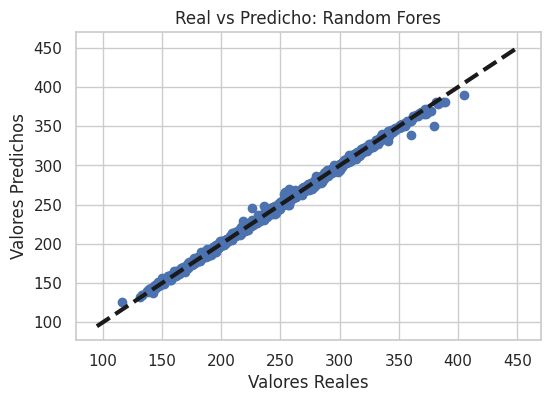

In [21]:
# Se vizualizan los resultados
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Real vs Predicho: Random Fores')
plt.show()

In [22]:
# Se crea un DataFrame con los resultados de ambos modelos para compararlos
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'Mean Squared Error': [mse_rl, mse_rf],
    'R-squared': [r2_rl, r2_rf]
})

# Se muestran en una tabla
print("Comparación de Resultados de los Modelos:")
print(tabulate(resultados, headers='keys', tablefmt='pretty', showindex=False))

Comparación de Resultados de los Modelos:
+------------------+---------------------+--------------------+
|      Modelo      | Mean Squared Error  |     R-squared      |
+------------------+---------------------+--------------------+
| Regresión Lineal | 0.08660050616047052 | 0.9999676459464607 |
|  Random Forest   |  4.986242578356004  | 0.9981371337594596 |
+------------------+---------------------+--------------------+


###**Hallazgos y Conclusiones:**

*   Existe una gran variedad en los datos de puntajes obtenidos por los estudiantes en cada área. En algunos casos hay una diferencia significativa por géneros entre el puntaje promedio total y sus áreas de estudio, en otras el puntaje de una área supera al otro.

*   En algunos municipios se presentan diferencias muy grandes en sus resultados y muchos de estos municipios tienen características socioeconómicas diferentes, lo que muestra que los factores socioeconomicos influyen directamente en los estudiantes.

*   Al predecir el puntaje global de los estudiantes enfocado en sus resultados, se ajustan los modelos de regresión: Regresión lineal y Random Forest. Los dos modelos se ajustan muy bien a los datos, pero cuando se trata de predicción, Random Forest están ligeramente adelantados.

###**Recomendaciones:**

*   Estos resultados podrían utilizarse para identificar áreas de mejora en el sistema educativo de Nariño y con ellos diseñar palnes específicos dirigidos a mejorar el desempeño estudiantil.

*   Estos hallazgos pueden mostrar la necesidad de un análisis adicional con el fim de explorar la relación entre el desempeño estudiantil y variables como el nivel socioeconómico, el tipo de institución educativa y el acceso a recursos educativos.

*   Despues de este proyecto seria my importante hacer un seguimiento a largo plazo de los estudiantes para evaluar el efecto de cualquier plan de mejora.

#**Espacio para realizar predicciones**

In [23]:
# Aqui se realiza una predicción con nuevos datos

# Se debera agregar datos como puntaje de cada asignatura para que el modelo pueda mostrar el promedio total
nuevo_estudiante = pd.DataFrame({
    'PUNT_MATEMATICAS': [20],
    'PUNT_LECTURA_CRITICA': [60],
    'PUNT_SOCIALES_CIUDADANAS': [90],
    'PUNT_C_NATURALES': [100],
    'PUNT_INGLES': [20]
})

# Predicción con el modelo de Regresion Lineal
prediccion_rl = model.predict(nuevo_estudiante)
print(f"Predicción del Puntaje Global para el nuevo estudiante (Regresion Lineal): {prediccion_rl[0]}")

# Predicción con el modelo de Random Forest
prediccion_rf = model_rf.predict(nuevo_estudiante)
print(f"Predicción del Puntaje Global para el nuevo estudiante (Random Forest)   : {prediccion_rf[0]}")

Predicción del Puntaje Global para el nuevo estudiante (Regresion Lineal): 319.2126794138088
Predicción del Puntaje Global para el nuevo estudiante (Random Forest)   : 344.31


#**Sección de SQL**

En un proyecto de análisis de datos, el lenguaje SQL es muy importante como herramienta de analisis para extraer información valiosa de conjuntos de datos grandes.

Con este tipo de consultas SQL se pueden aplicar análisis desde la exploración y limpieza de datos hasta la generación de consultas particulares que generan conocimientos del dataset, como patrones dentro de los datos o tendencias de los mismos.

In [24]:
from sqlalchemy import create_engine

# Se crea una base de datos SQLite en memoria
db_memoria = create_engine('sqlite:///PruebaSaber11.db')

# Se guarda el df en la base de datos antes creada
data.to_sql('PruebaSaber11', con=db_memoria, index=False, if_exists='replace')

16903

Municipios con mayor promedio general:
  ESTU_MCPIO_RESIDE  AVG_PUNT_GLOBAL
0         GUALMATÁN       281.661972
1           PUERRES       274.038835
2         GUACHUCAL       269.813278
3         CONTADERO       268.157143
4             PASTO       267.817403
5       GUAITARILLA       266.198276
6           LINARES       265.306931
7            POTOSÍ       262.311927
8           IPIALES       262.293318
9            OSPINA       262.263889


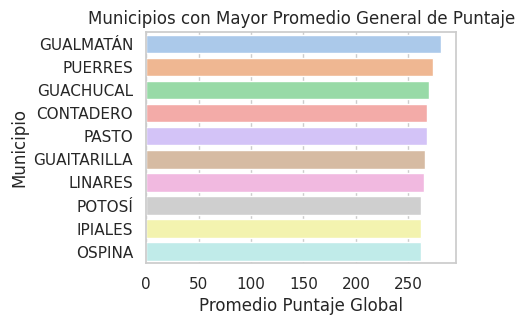

In [25]:
# SQL para consultar municipios con mayor promedio general de mayor a menor

municipios = """
SELECT ESTU_MCPIO_RESIDE, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY ESTU_MCPIO_RESIDE
ORDER BY AVG_PUNT_GLOBAL DESC
"""
municipios_promedio = pd.read_sql(municipios, con=db_memoria)
print("Municipios con mayor promedio general:")
print(municipios_promedio.head(10))

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("pastel")

# Generar la gráfica de barras con el parámetro y asignando la paleta de colores personalizada
plt.figure(figsize=(4, 3))
sns.barplot(x='AVG_PUNT_GLOBAL', y='ESTU_MCPIO_RESIDE', data=municipios_promedio.head(10), hue='ESTU_MCPIO_RESIDE', palette=custom_palette, legend=False)
plt.title('Municipios con Mayor Promedio General de Puntaje')
plt.xlabel('Promedio Puntaje Global')
plt.ylabel('Municipio')
plt.show()

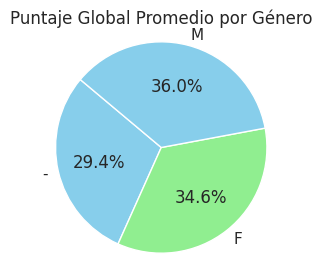

In [26]:
# SQL para calcular el puntaje global promedio por género

puntaje_genero = """
SELECT ESTU_GENERO, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY ESTU_GENERO
"""
puntaje_genero = pd.read_sql(puntaje_genero, con=db_memoria)

# Datos para el gráfico de pastel
labels = puntaje_genero['ESTU_GENERO']
sizes = puntaje_genero['AVG_PUNT_GLOBAL']
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de pastel
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Puntaje Global Promedio por Género')
plt.axis('equal')
plt.show()

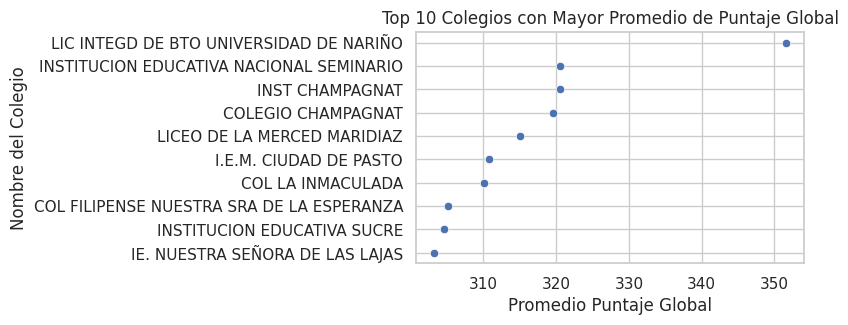

In [27]:
# SQL para consultar los mejores 10 colegios de mayor a menor

mejores_colegios = """
SELECT COLE_NOMBRE_ESTABLECIMIENTO, ESTU_MCPIO_RESIDE AS MUNICIPIO, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY COLE_NOMBRE_ESTABLECIMIENTO
ORDER BY AVG_PUNT_GLOBAL DESC
LIMIT 10
"""
mejores_colegios = pd.read_sql(mejores_colegios, con=db_memoria)

# Crear la gráfica de puntos para los 10 mejores colegios
plt.figure(figsize=(5, 3))
sns.scatterplot(x='AVG_PUNT_GLOBAL', y='COLE_NOMBRE_ESTABLECIMIENTO', data=mejores_colegios)
plt.title('Top 10 Colegios con Mayor Promedio de Puntaje Global')
plt.xlabel('Promedio Puntaje Global')
plt.ylabel('Nombre del Colegio')
plt.show()

Colegios en Pasto con mayor promedio general:
                 COLE_NOMBRE_ESTABLECIMIENTO  AVG_PUNT_GLOBAL
0    LIC INTEGD DE BTO UNIVERSIDAD DE NARIÑO       351.727273
1                            INST CHAMPAGNAT       320.541985
2                LICEO DE LA MERCED MARIDIAZ       315.145161
3                     I.E.M. CIUDAD DE PASTO       310.756000
4                          COL LA INMACULADA       310.100000
5  COL FILIPENSE NUESTRA SRA DE LA ESPERANZA       305.115385
6  CENTRO EDUCATIVO CONOCIMIENTO Y SABIDURIA       304.000000
7                        COL SAN FELIPE NERI       297.180851
8            I.E.M. NORMAL SUPERIOR DE PASTO       295.757009
9   INSTITUCION  EDUCATIVA  LAS MESAS  INSEM       291.000000


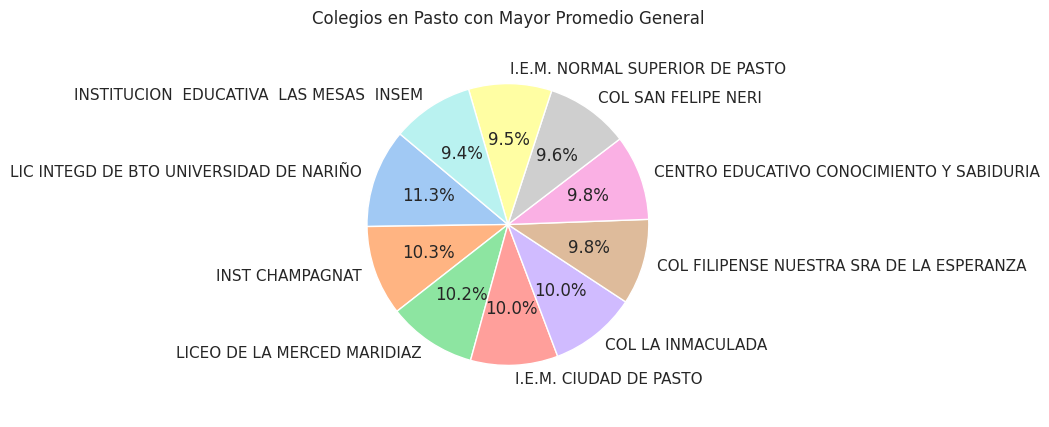

In [28]:
colegios_pasto = """
SELECT COLE_NOMBRE_ESTABLECIMIENTO , AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
WHERE ESTU_MCPIO_RESIDE = 'PASTO'
GROUP BY COLE_NOMBRE_ESTABLECIMIENTO
ORDER BY AVG_PUNT_GLOBAL DESC
LIMIT 10
"""
colegios_promedio = pd.read_sql(colegios_pasto, con=db_memoria)
print("Colegios en Pasto con mayor promedio general:")
print(colegios_promedio)

# Datos para el diagrama de pastel
labels = colegios_promedio['COLE_NOMBRE_ESTABLECIMIENTO']
sizes = colegios_promedio['AVG_PUNT_GLOBAL']

# Colores personalizados
# Definir una paleta de colores personalizada
colors = sns.color_palette("pastel")

# Crear el diagrama de pastel
plt.figure(figsize=(4, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Colegios en Pasto con Mayor Promedio General')
plt.axis('equal')
plt.show()

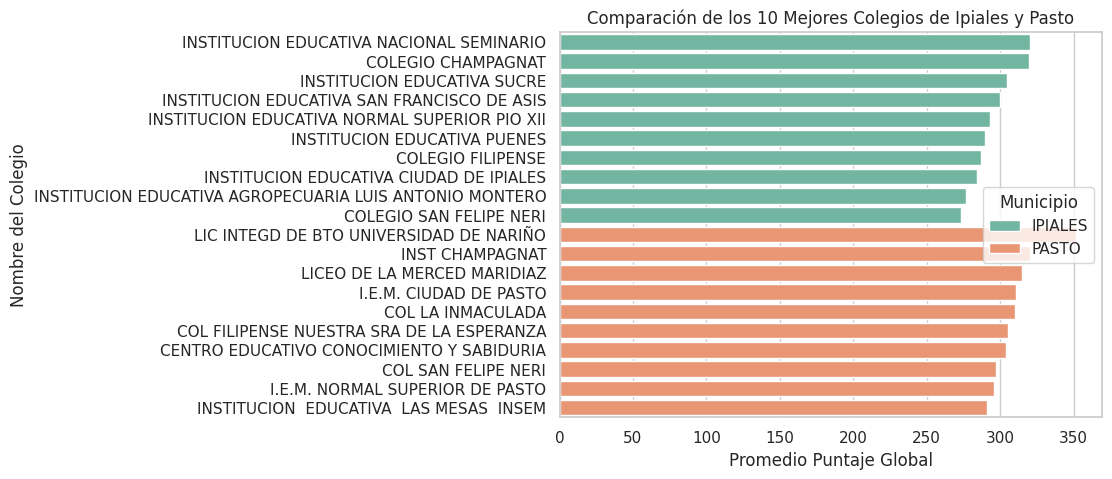

In [29]:
# Consulta SQL para comparar los 10 mejores colegios de Ipiales y Pasto
mejores_colegios_ipiales_pasto = """
SELECT COLE_NOMBRE_ESTABLECIMIENTO, ESTU_MCPIO_RESIDE AS MUNICIPIO, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
WHERE ESTU_MCPIO_RESIDE IN ('IPIALES', 'PASTO')
GROUP BY ESTU_MCPIO_RESIDE, COLE_NOMBRE_ESTABLECIMIENTO
ORDER BY ESTU_MCPIO_RESIDE, AVG_PUNT_GLOBAL DESC
"""
mejores_colegios = pd.read_sql(mejores_colegios_ipiales_pasto, con=db_memoria)

# Mostrar los 10 mejores colegios de Ipiales y los 10 mejores de Pasto
top_10_ipiales = mejores_colegios[mejores_colegios['MUNICIPIO'] == 'IPIALES'].head(10)
top_10_pasto = mejores_colegios[mejores_colegios['MUNICIPIO'] == 'PASTO'].head(10)

# Concatenar los datos de los 10 mejores colegios de Ipiales y Pasto
top_10 = pd.concat([top_10_ipiales, top_10_pasto])

# Crear la gráfica de barras agrupadas
plt.figure(figsize=(7, 5))
sns.barplot(x='AVG_PUNT_GLOBAL', y='COLE_NOMBRE_ESTABLECIMIENTO', hue='MUNICIPIO', data=top_10, palette='Set2')
plt.title('Comparación de los 10 Mejores Colegios de Ipiales y Pasto')
plt.xlabel('Promedio Puntaje Global')
plt.ylabel('Nombre del Colegio')
plt.legend(title='Municipio')
plt.show()

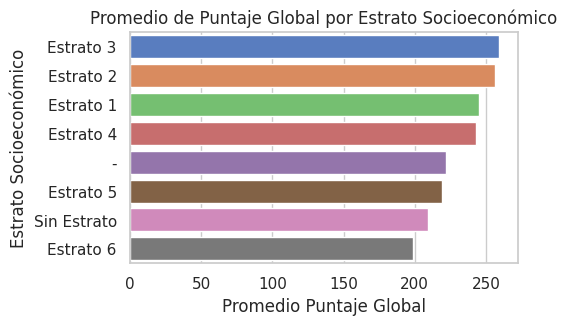

In [30]:
# SQL para calcular el Impacto del Estrato Socioeconómico

estrato_sql = """
SELECT FAMI_ESTRATOVIVIENDA, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY FAMI_ESTRATOVIVIENDA
ORDER BY AVG_PUNT_GLOBAL DESC
"""
estrato_promedio = pd.read_sql(estrato_sql, con=db_memoria)

plt.figure(figsize=(5, 3))
sns.barplot(x='AVG_PUNT_GLOBAL', y='FAMI_ESTRATOVIVIENDA', hue='FAMI_ESTRATOVIVIENDA', data=estrato_promedio, palette='muted', dodge=False, legend=False)
plt.title('Promedio de Puntaje Global por Estrato Socioeconómico')
plt.xlabel('Promedio Puntaje Global')
plt.ylabel('Estrato Socioeconómico')
plt.show()

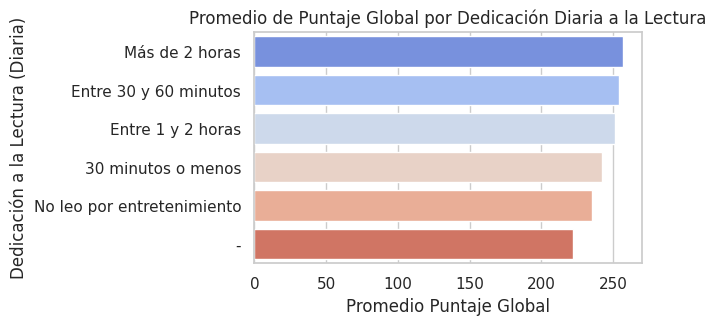

In [31]:
# SQL para calcular Impacto de la Dedicación Diaria a la Lectura

lectura_sql = """
SELECT ESTU_DEDICACIONLECTURADIARIA, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY ESTU_DEDICACIONLECTURADIARIA
ORDER BY AVG_PUNT_GLOBAL DESC
"""
lectura_promedio = pd.read_sql(lectura_sql, con=db_memoria)

plt.figure(figsize=(5, 3))
sns.barplot(x='AVG_PUNT_GLOBAL', y='ESTU_DEDICACIONLECTURADIARIA', hue='ESTU_DEDICACIONLECTURADIARIA', data=lectura_promedio, palette='coolwarm', dodge=False, legend=False)
plt.title('Promedio de Puntaje Global por Dedicación Diaria a la Lectura')
plt.xlabel('Promedio Puntaje Global')
plt.ylabel('Dedicación a la Lectura (Diaria)')
plt.show()

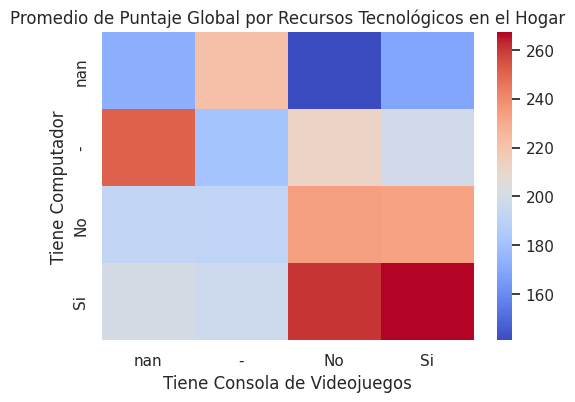

In [32]:
# SQL para calcular Impacto de la Dedicación Diaria a la Lectura

recursos_sql = """
SELECT FAMI_TIENECOMPUTADOR, FAMI_TIENECONSOLAVIDEOJUEGOS, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY FAMI_TIENECOMPUTADOR, FAMI_TIENECONSOLAVIDEOJUEGOS
"""
recursos_promedio = pd.read_sql(recursos_sql, con=db_memoria)

plt.figure(figsize=(6, 4))
pivot_table = recursos_promedio.pivot(index="FAMI_TIENECOMPUTADOR", columns="FAMI_TIENECONSOLAVIDEOJUEGOS", values="AVG_PUNT_GLOBAL")
sns.heatmap(pivot_table, annot=False, cmap="coolwarm")
plt.title('Promedio de Puntaje Global por Recursos Tecnológicos en el Hogar')
plt.xlabel('Tiene Consola de Videojuegos')
plt.ylabel('Tiene Computador')
plt.show()

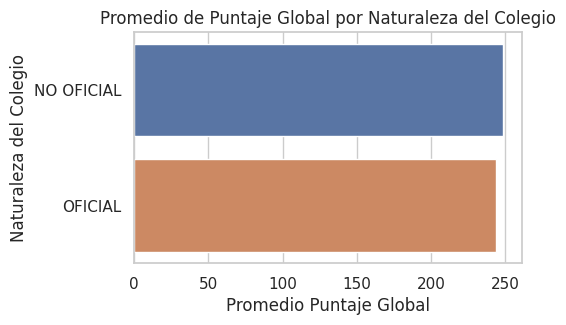

In [33]:
# # SQL para calcular Comparación entre Colegios Públicos y Privados

naturaleza_sql = """
SELECT COLE_NATURALEZA, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY COLE_NATURALEZA
ORDER BY AVG_PUNT_GLOBAL DESC
"""
naturaleza_promedio = pd.read_sql(naturaleza_sql, con=db_memoria)

plt.figure(figsize=(5, 3))
sns.barplot(x='AVG_PUNT_GLOBAL', y='COLE_NATURALEZA', hue='COLE_NATURALEZA', data=naturaleza_promedio, palette='deep', dodge=False, legend=False)
plt.title('Promedio de Puntaje Global por Naturaleza del Colegio')
plt.xlabel('Promedio Puntaje Global')
plt.ylabel('Naturaleza del Colegio')
plt.show()

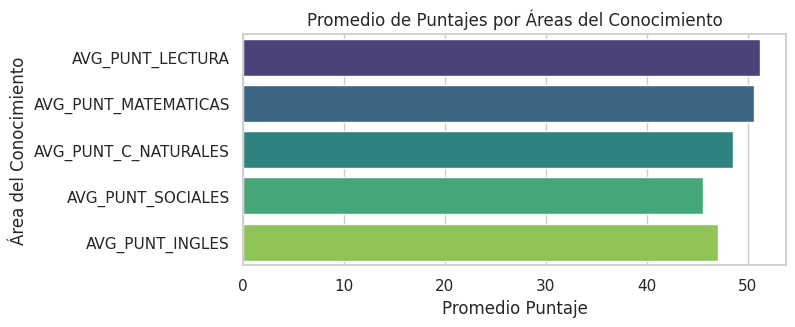

In [34]:
# SQL para calcular Promedio de Puntajes por Áreas del Conocimiento

areas_sql = """
SELECT AVG(PUNT_LECTURA_CRITICA) as AVG_PUNT_LECTURA, AVG(PUNT_MATEMATICAS) as AVG_PUNT_MATEMATICAS,
       AVG(PUNT_C_NATURALES) as AVG_PUNT_C_NATURALES, AVG(PUNT_SOCIALES_CIUDADANAS) as AVG_PUNT_SOCIALES,
       AVG(PUNT_INGLES) as AVG_PUNT_INGLES
FROM PruebaSaber11
"""
areas_promedio = pd.read_sql(areas_sql, con=db_memoria)
areas_promedio_melt = areas_promedio.melt(var_name='Área', value_name='Promedio Puntaje')

plt.figure(figsize=(7, 3))
sns.barplot(x='Promedio Puntaje', y='Área', hue='Área', data=areas_promedio_melt, palette='viridis', dodge=False, legend=False)
plt.title('Promedio de Puntajes por Áreas del Conocimiento')
plt.xlabel('Promedio Puntaje')
plt.ylabel('Área del Conocimiento')
plt.show()

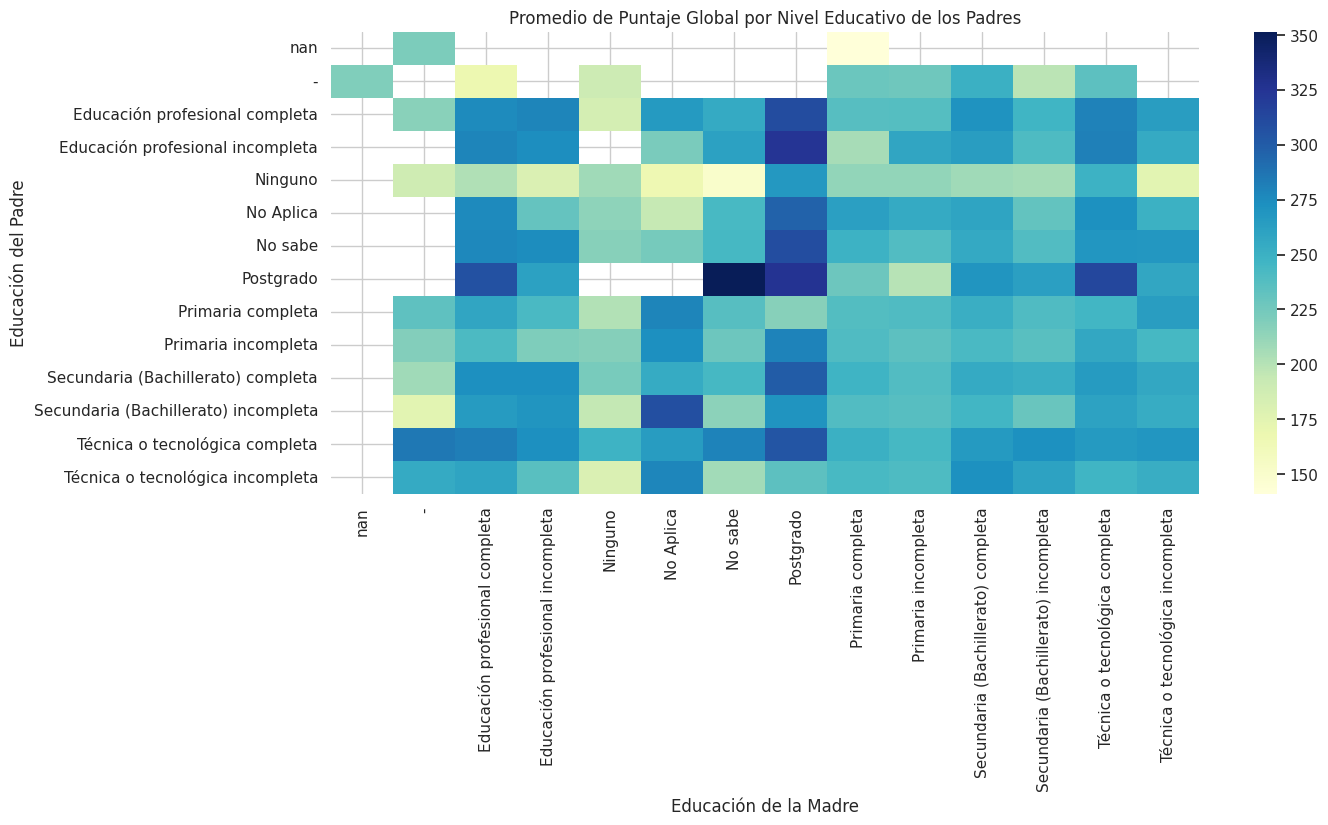

In [35]:
# SQL para calcular Impacto del Nivel Educativo de los Padres:

edu_padres_sql = """
SELECT FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, AVG(PUNT_GLOBAL) as AVG_PUNT_GLOBAL
FROM PruebaSaber11
GROUP BY FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE
"""
edu_padres_promedio = pd.read_sql(edu_padres_sql, con=db_memoria)

pivot_table = edu_padres_promedio.pivot(index="FAMI_EDUCACIONPADRE", columns="FAMI_EDUCACIONMADRE", values="AVG_PUNT_GLOBAL")

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap="YlGnBu")  # Removed the annot=True parameter
plt.title('Promedio de Puntaje Global por Nivel Educativo de los Padres')
plt.xlabel('Educación de la Madre')
plt.ylabel('Educación del Padre')
plt.show()

#**CONCLUCIONES ANALISIS SQL**

*   El análisis del puntaje global promedio en relación con el nivel educativo de los padres muestra una tendencia clara: los estudiantes cuyos padres tienen niveles educativos más altos tienden a obtener mejores puntajes. Esto sugiere que el entorno educativo del hogar, influenciado por el nivel educativo de los padres, tiene un impacto significativo en el desempeño académico de los estudiantes.

*   El análisis del puntaje global promedio por estrato socioeconómico indica que los estudiantes de estratos más altos tienden a obtener puntajes más altos en la prueba Saber 11. Esto refleja la desigualdad en el acceso a recursos educativos y apoyo adicional, lo que puede contribuir a un mejor desempeño académico entre los estudiantes de estratos más altos.

*   El puntaje global promedio por departamento de residencia muestra variaciones significativas entre los departamentos. Algunos departamentos tienen promedios notablemente más altos, lo que podría estar relacionado con factores como la calidad de la educación, la infraestructura escolar y el apoyo gubernamental en esas regiones. Esto resalta la importancia de abordar las disparidades regionales en el sistema educativo.

*   La comparación de puntajes entre géneros no muestra diferencias significativas en los puntajes globales promedio entre hombres y mujeres. Esto sugiere que, en términos generales, no hay una brecha de género notable en el rendimiento académico en la prueba Saber 11. Sin embargo, se podría profundizar en análisis específicos de materias para identificar si existen diferencias en áreas específicas.

*   El análisis del impacto de los recursos tecnológicos en el hogar (como la presencia de computadoras y consolas de videojuegos) en el puntaje global sugiere que los estudiantes con acceso a ciertos recursos tecnológicos tienden a obtener mejores puntajes. Esto podría estar relacionado con el acceso a herramientas educativas y recursos de aprendizaje en línea que facilitan el estudio y la preparación para exámenes.

*   La comparación de los mejores colegios en distintos municipios (por ejemplo, Pasto e Ipiales) muestra que hay colegios en cada municipio que consistentemente obtienen puntajes altos. Esto puede indicar la presencia de buenas prácticas educativas y un entorno de aprendizaje positivo en estos colegios, lo cual podría ser replicado en otros colegios para mejorar el desempeño académico en general.

*   El análisis del puntaje global promedio por género y por recursos disponibles en el hogar no muestra diferencias significativas de género en los puntajes globales promedio. Sin embargo, los estudiantes con acceso a más recursos tecnológicos y educativos tienden a tener un mejor desempeño académico, independientemente de su género.

#**Bibliografia**

El código utilizado en este análisis proviene de diversos proyectos propios desarrollados durante la especialización en Análisis de Datos y Big Data con la Universidad Internacional de La Rioja (UNIR). A lo largo de esta especialización, se abordaron múltiples técnicas y herramientas para el análisis de datos, lo cual ha sido fundamental para la creación de este trabajo.

Además, parte del código ha sido reutilizado del bootcamp "Análisis de Datos Nivel Innovador", donde se aprendieron y aplicaron prácticas avanzadas en el manejo y visualización de datos, así como en la elaboración de consultas SQL complejas y la generación de gráficos informativos.

Finalmente, se ha contado con el soporte y la colaboración de ChatGPT, que ha proporcionado ayuda en la optimización de consultas SQL y la creación de gráficos, asegurando la precisión y efectividad en la presentación de los datos analizados.